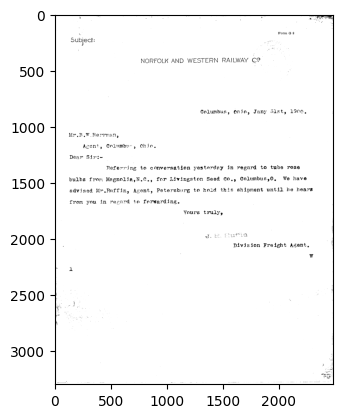

In [139]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

input_image_path = cv2.imread('letter.jpeg')
I = cv2.cvtColor(cv2.imread("letter.jpeg") , cv2.COLOR_RGB2BGR)
grayScale = cv2.cvtColor(input_image_path, cv2.COLOR_BGR2GRAY)

thresh, binary_image = cv2.threshold(grayScale, 127, 255, 0)
forContours = np.copy(binary_image)
plt.imshow(binary_image,'gray',vmin=0,vmax=255)

In [92]:
#find contours
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("Number of contours = " + str(len(contours)))
print(contours[0])

cv2.imshow('Image', input_image_path)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# for i in range (1,5):
#     cv2.waitKey(1)
    
cv2.drawContours(input_image_path, contours, -1, (255, 0, 0), 3)
cv2.drawContours(grayScale, contours, -1, (0, 255, 0), 3)

cv2.imshow('Image', input_image_path)
cv2.waitKey(0)
cv2.destroyAllWindows()
for i in range (1,5):
    cv2.waitKey(1)

Number of contours = 2178
[[[0 0]]

 [[0 1]]

 [[0 2]]

 ...

 [[3 0]]

 [[2 0]]

 [[1 0]]]


1241 1649
203 3288
99 3288
637 3287
438 3287
435 3287
426 3287
409 3287
404 3287
399 3287
346 3287
343 3287
327 3287
312 3287
304 3287
297 3287
290 3287
282 3287
276 3287
273 3287
265 3287
258 3287
236 3287
232 3287
208 3287
197 3287
114 3287
55 3288
1047 3286
806 3286
781 3286
773 3286
757 3286
705 3286
415 3286
108 3286
1259 3285
1216 3285
1207 3285
1202 3285
1157 3285
1144 3285
1133 3285
1122 3285
1117 3285
1069 3285
1064 3285
1059 3285
1056 3285
1048 3285
1037 3285
1021 3285
981 3285
954 3285
943 3285
1623 3284
1620 3284
1577 3284
1567 3284
1556 3284
1548 3284
1541 3284
1344 3284
1321 3284
1317 3284
1314 3284
1271 3284
1861 3283
1855 3283
1849 3283
1839 3283
1825 3283
1810 3283
1804 3283
1798 3283
1791 3283
1783 3283
1770 3283
1739 3283
1725 3283
1718 3283
1706 3283
1690 3283
1684 3283
1679 3283
1642 3283
1632 3283
1615 3283
1598 3283
2151 3282
2131 3282
2127 3282
2119 3282
2102 3282
2094 3282
2083 3282
2077 3282
2073 3282
2065 3282
2060 3282
2035 3282
2031 3282
2025 3282
2017 3282

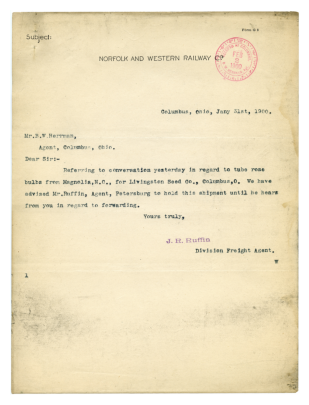

In [103]:
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.circle(binary_image, (cx, cy), 10, (0, 0, 255), -1)
    print(cx, cy)

cv2.imshow('input_image', binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
for i in range (1,5):
    cv2.waitKey(1)
    
plt.figure(figsize=[5,5])
plt.imshow(input_image[:,:,::-1]);plt.axis("off");

In [147]:
import pytesseract

# for cnt in contours:
#     x, y, w, h = cv2.boundingRect(cnt)
     
#     # Drawing a rectangle on copied image
#     rect = cv2.rectangle(forContours, (x, y), (x + w, y + h), (0, 255, 0), 2)
     
#     # Cropping the text block for giving input to OCR
#     cropped = forContours[y:y + h, x:x + w]
#     print(cropped)
#     # Open the fxile in append mode
#     file = open("recognized.txt", "w")
     
#     # Apply OCR on the cropped image
#     text = pytesseract.image_to_string(cropped)
     
#     # Appending the text into file
#     file.write(text)
#     file.write("\n")
     
#     # Close the file
#     file.close


# Initialize the file for writing
file = open("recognized.txt", "w")

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    rect = cv2.rectangle(forContours, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Crop the text block for OCR input
    cropped = forContours[y:y + h, x:x + w]
    print(cropped)
    try:
        # Apply OCR on the cropped image
        text = pytesseract.image_to_string(cropped, config='--psm 6 -l eng')
        
        # Appending the recognized text into the file
        file.write(text)
        file.write("\n")
    except Exception as e:
        # Handle any OCR errors
        print(f"OCR Error: {str(e)}")

# Close the file
file.close()

# cv2.imshow('rect', rect)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# for i in range (1,5):
#     cv2.waitKey(1)



[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0 255 ... 255 255   0]
 ...
 [  0   0 255 ... 255 255   0]
 [  0   0 255 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]


In [ ]:
|